In [2]:
import h5py, sys, os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm

In [3]:
sys.path.append('/mnt/cbis/home/benedikt/.local/dragonfly/utils/py_src')

In [4]:
import writeemc
import detector
import reademc

In [5]:
path_to_data = "../../data/sparse/" # scratch/sparse on Maxwell
path_to_aux = "../../data/aux/" # scratch/benedikt/aux on Maxwell
path_to_geometry = "../../geometry/"
path_to_recons = "../../data/recons/"

## Reading 2D EMC classes (round 0)

In [45]:
emc_folder = path_to_recons + "melv_0000/"
emc_output = emc_folder + "data/r1/output_040.h5"
emc_photons = emc_folder + 'photons.txt'
emc_detector = path_to_recons + "det/det_lowq8.h5"

In [46]:
photons_list = list(np.loadtxt(emc_photons, dtype=str))
photons_list = [emc_folder + p for p in photons_list]

In [47]:
det = detector.Detector(emc_detector, mask_flag=True)
emc = reademc.EMCReader(photons_list, det)

Parsing HDF5 detector file


Reading ../../data/recons/det/det_lowq8.h5...with mask...done


In [49]:
with h5py.File(emc_output,'r') as f:
    occupancies = f['occupancies'][:]
    likelihood = f['likelihood'][:]
    orientations = f['orientations'][:]
    images = f['intens'][:]

In [50]:
blacklist = np.loadtxt(path_to_data + 'lowq/blacklist_0.txt')
modes = orientations % occupancies.shape[1]
modes_good = modes[~blacklist.astype(np.bool)]
ngood = len(modes_good)

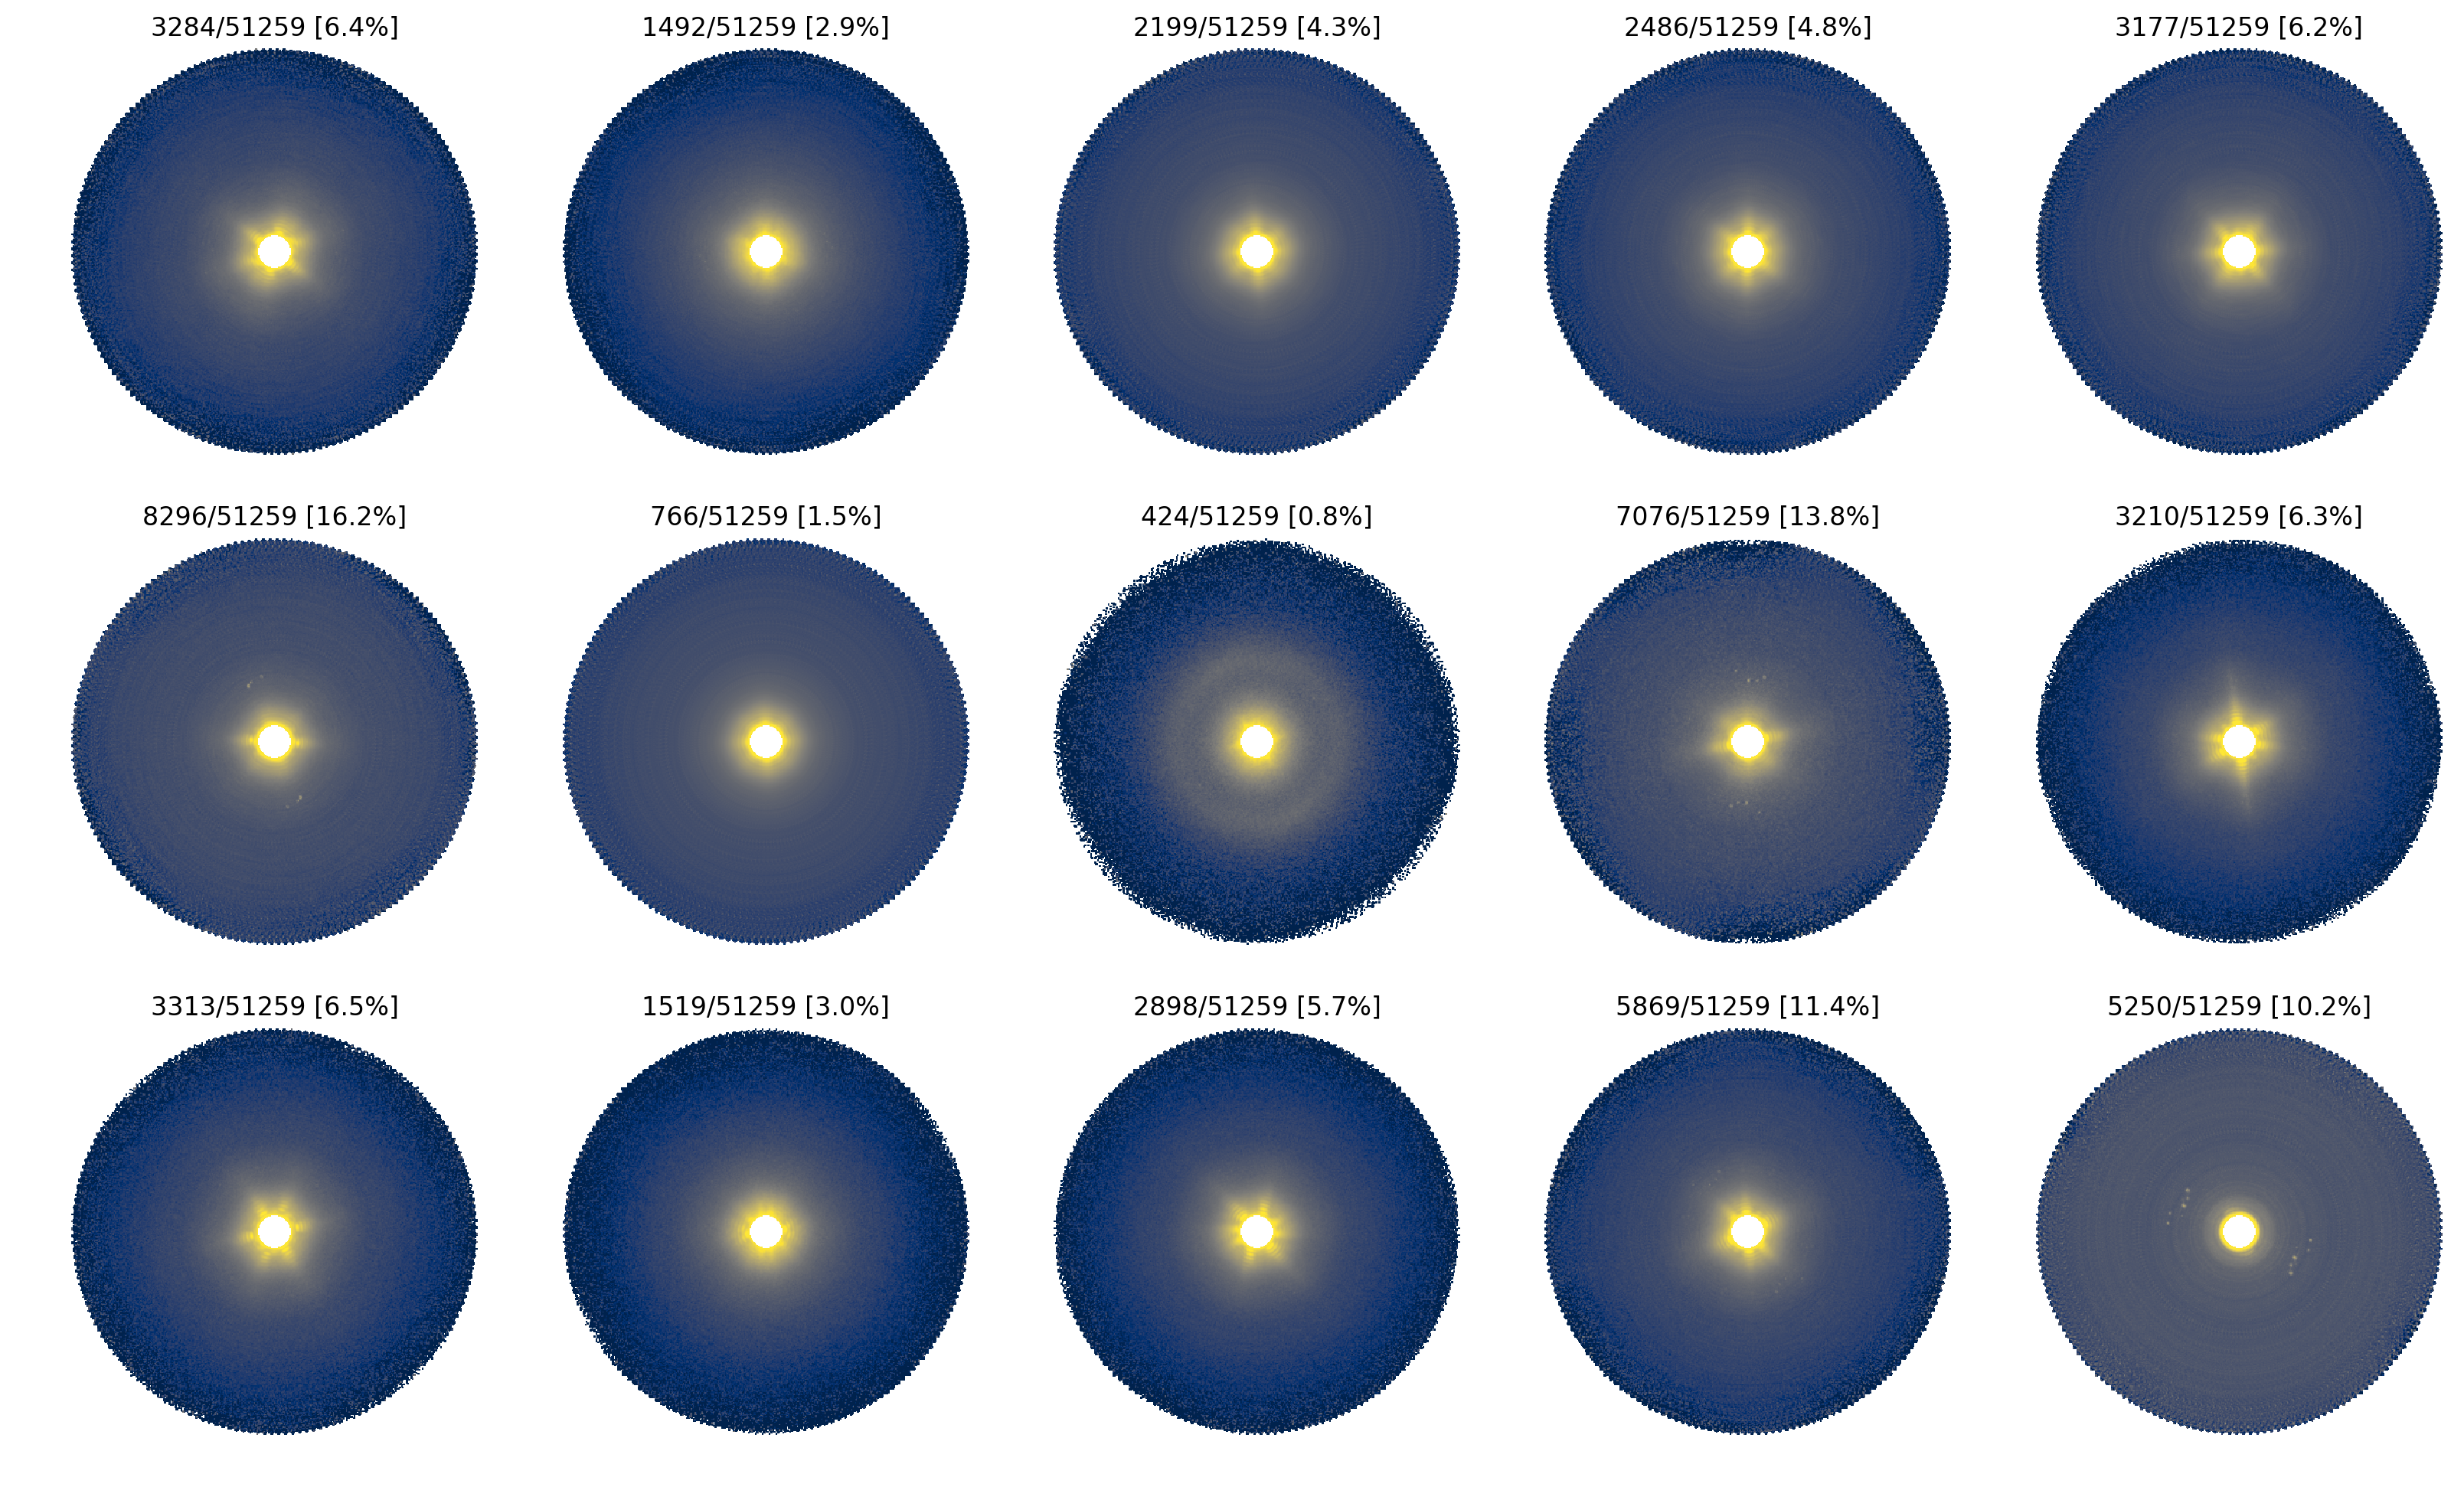

In [51]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20,12), dpi=200)
for i in range(15):
    c,r = i//5, i%5
    axes[c,r].axis('off')
    nclass = (modes_good==i).sum()
    axes[c,r].set_title("%d/%d [%.1f%%]" %(nclass,ngood, nclass/ngood*100.))
    axes[c,r].imshow(images[i], norm=colors.LogNorm(vmin=0.0001, vmax=0.8), cmap='cividis')
plt.savefig("../../plots/2dclasses.png", bbox_inches='tight')
plt.show()

## Add bad classes into the blacklist

In [9]:
#remove = 2,6,11,15,17,22,30,38,39,45,46,48,49

In [ ]:
#blacklist = np.zeros(occupancies.shape[0], dtype=int)
#for m in remove:
#    blacklist[np.where(modes == m)[0]] = 1
#ndata = blacklist.shape[0] - blacklist.sum()

In [ ]:
#np.savetxt(path_to_data + "lowq/lacklist_1_%d.dat" %(ndata), blacklist, fmt='%d')